# Writing a Blog Post - Project

## Data Science Nanodegree

For this project, I have chosen the Stack Overflow data from 2019 to better understand:

1. As a programmer, which half of the world has more opportunities? The West or the East?
2. What is the salary difference in the western world and in the eastern world?
3. How are the programmers satisfying about their job between these two sides of the world?
4. Are there more jobs opportunity in the western world than that in the eastern world?
5. What is the Sex ratio of the developers on both sides of the world?

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Keeping only 2 digits after decimal
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Importing the dataset
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.00,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.00,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.00,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

## Visually analyzing the data

In [5]:
# Data Understanding
def display_bar_chart(df, column, title):

    status_vals = df[column].value_counts()
    val = (status_vals[:10]/df.shape[0]).plot(kind="barh");
    plt.title(title);
    totals = []

    for i in val.patches:
        totals.append(i.get_width())

    total = sum(totals)

    for j in val.patches:
        val.text(j.get_width()+.005, j.get_y()+.38, \
                 str(round((j.get_width()/total)*100, 1))+'%', fontsize=12,
    color='black')

    # invert for largest on top 
    val.invert_yaxis()
    
    

In [6]:
df.shape[0]

88883

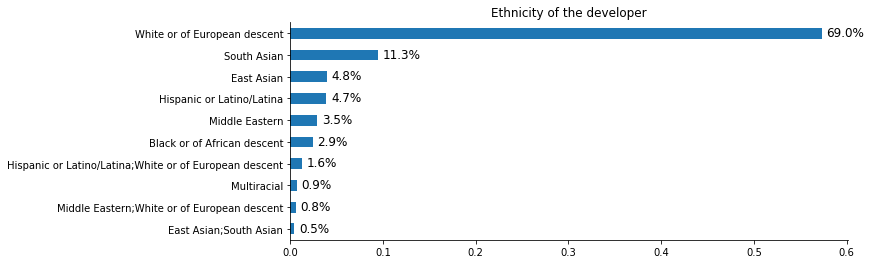

In [7]:
#Analyzing the Ethnicity of the developers
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "Ethnicity", "Ethnicity of the developer")

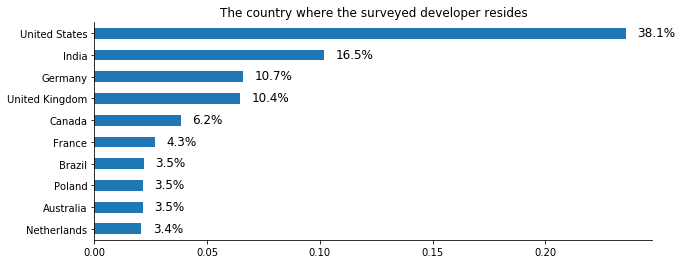

In [8]:
# Analyzing the country of residence of the developers
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "Country", "The country where the surveyed developer resides")

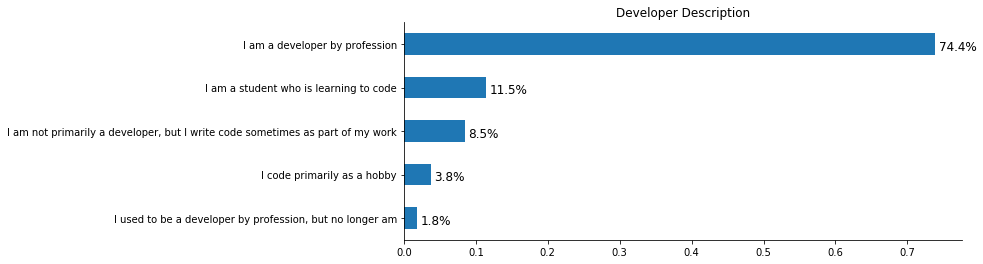

In [9]:
#Developer status description
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "MainBranch", "Developer Description")

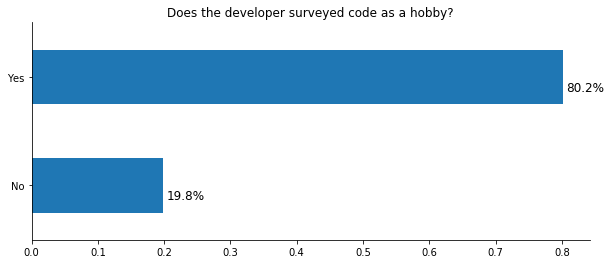

In [10]:
# Analyzing id the developer codes as a hobby
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "Hobbyist", "Does the developer surveyed code as a hobby?")

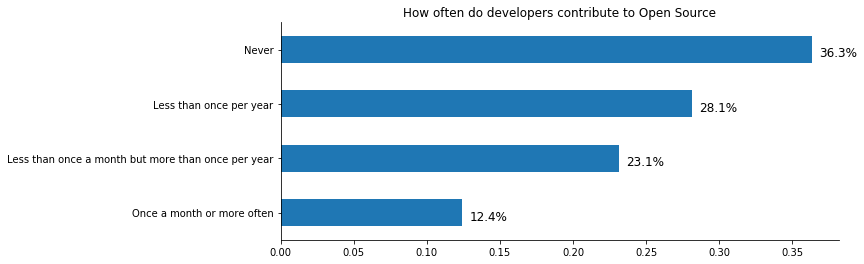

In [11]:
# Checking if the developer contributes to open source
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "OpenSourcer", "How often do developers contribute to Open Source")


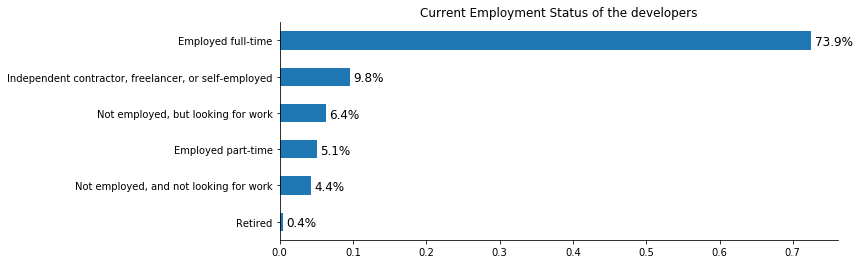

In [12]:
# Checking the current employment status of the developer
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "Employment", "Current Employment Status of the developers")

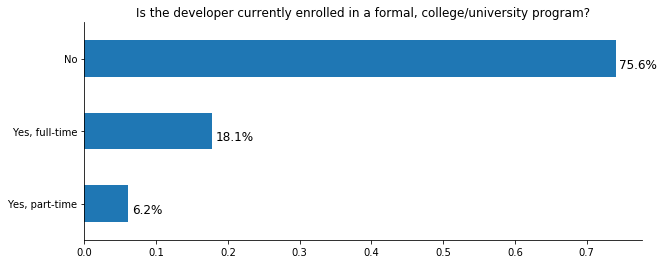

In [13]:
# Checking if the developer is a student
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "Student", "Is the developer currently enrolled in a formal, college/university program?")



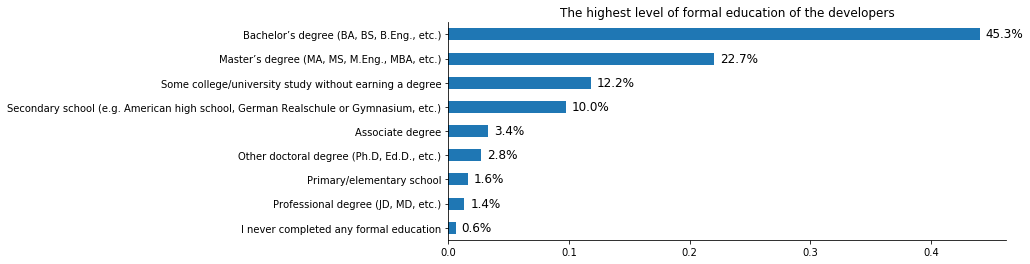

In [14]:
# Highest Level of education among the developers
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "EdLevel", "The highest level of formal education of the developers")

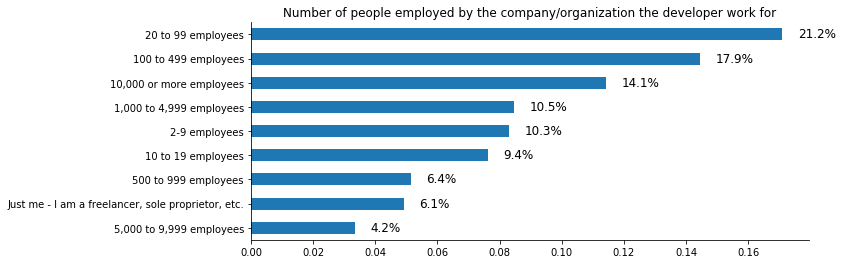

In [15]:
# Size of the organization where the developer is working
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "OrgSize", "Number of people employed by the company/organization the developer work for")

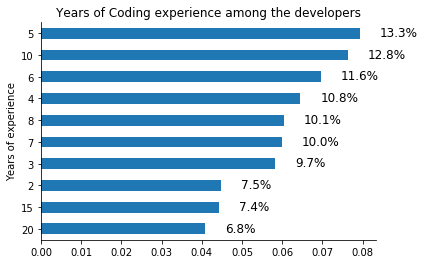

In [16]:
# Years of coding experience among the developers
plt.figure(figsize=(6,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Years of experience')
display_bar_chart(df, "YearsCode", "Years of Coding experience among the developers")

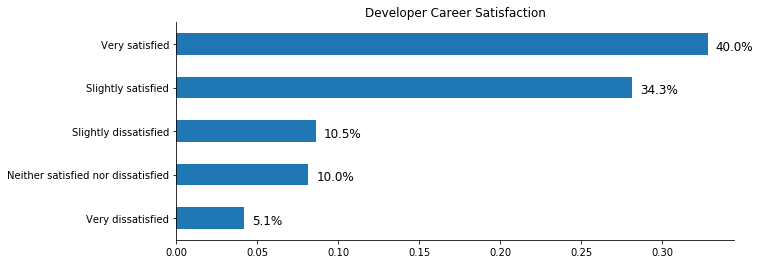

In [17]:
# Career Satisfaction among the developers
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "CareerSat", "Developer Career Satisfaction")

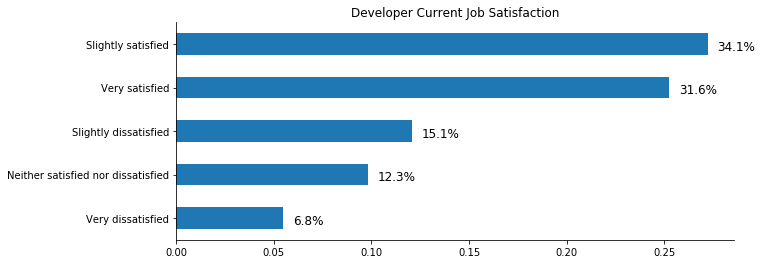

In [18]:
# Job Satisfaction among the developers
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "JobSat", "Developer Current Job Satisfaction")

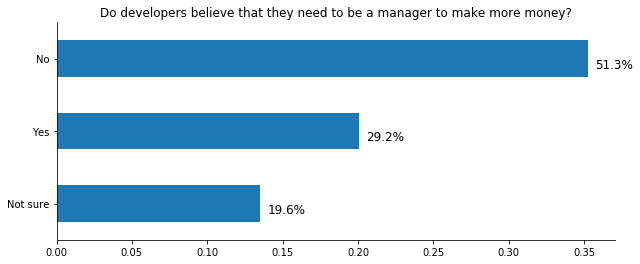

In [19]:
# Do developers believe that they need to be a manager to make more money?
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "MgrMoney", "Do developers believe that they need to be a manager to make more money?")

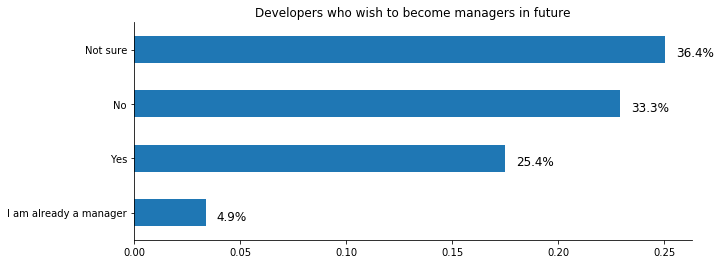

In [20]:
# Developers who wish to become managers in future
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "MgrWant", "Developers who wish to become managers in future")

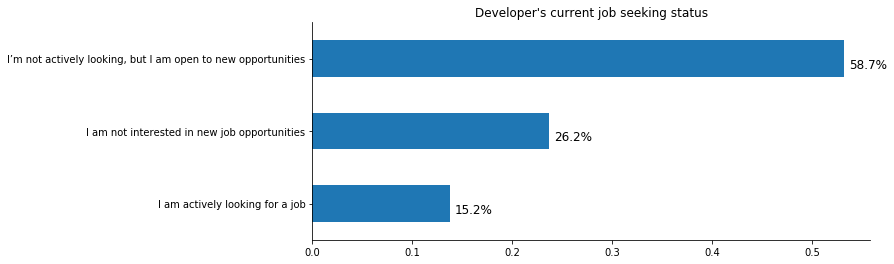

In [21]:
# Developer's job searching status
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "JobSeek", "Developer's current job seeking status")

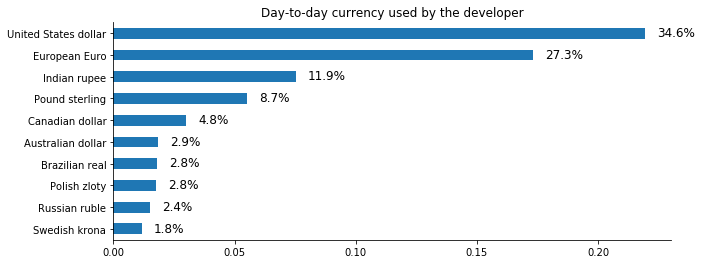

In [22]:
# Day-to-day currency used by the developer
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "CurrencyDesc", "Day-to-day currency used by the developer")

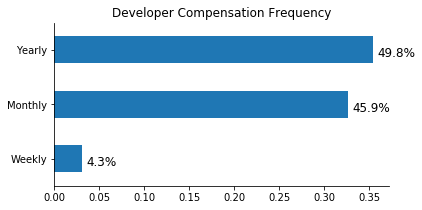

In [23]:
# Developer Compensation Frequency
plt.figure(figsize=(6,3))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.style.use('default')
display_bar_chart(df, "CompFreq", "Developer Compensation Frequency")

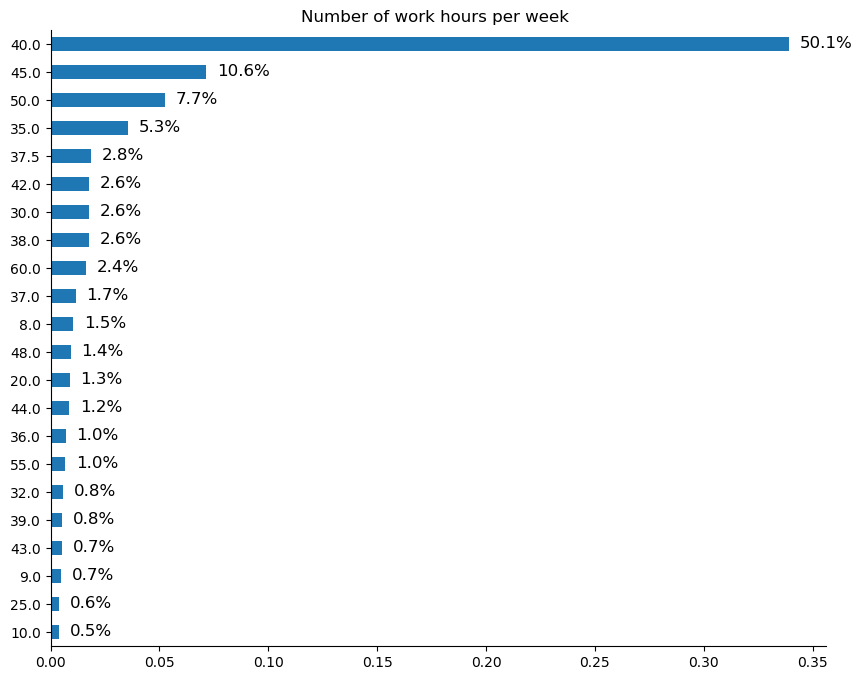

In [24]:
# Work hours per week
plt.figure(figsize=(10,8))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "WorkWeekHrs", "Number of work hours per week ")

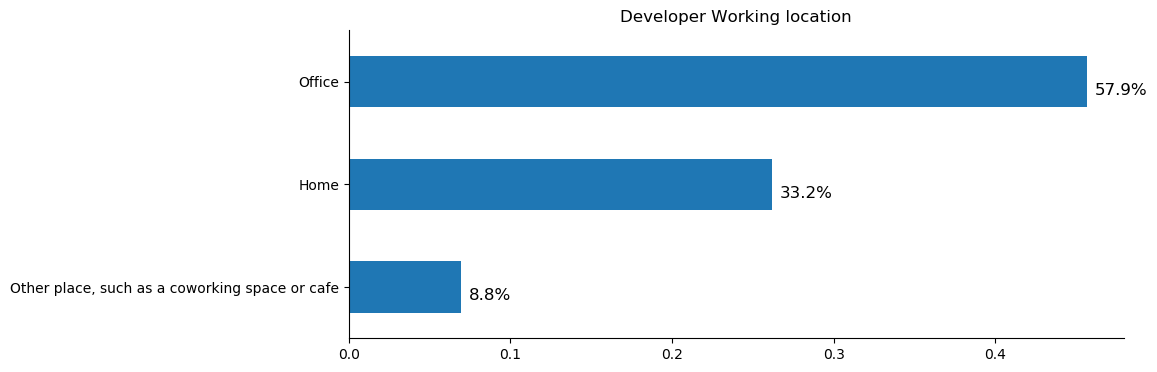

In [25]:
# Working location of the developers
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "WorkLoc", "Developer Working location")

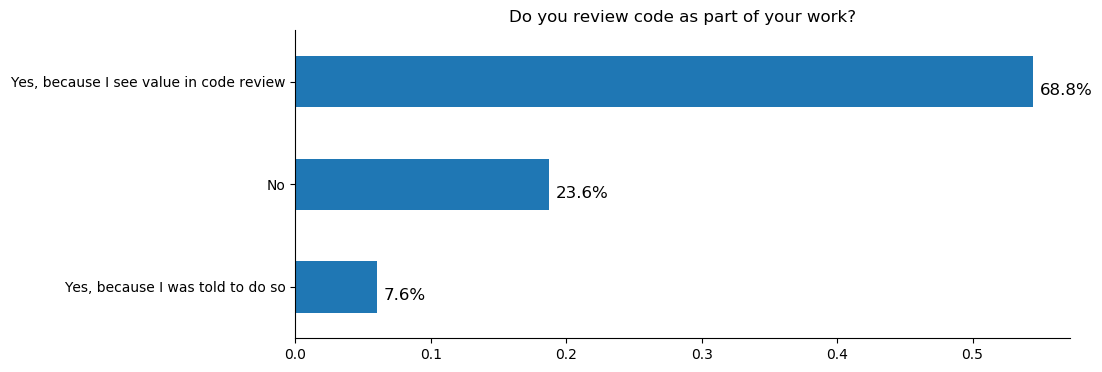

In [26]:
# Does the developer review code
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "CodeRev", "Do you review code as part of your work?")

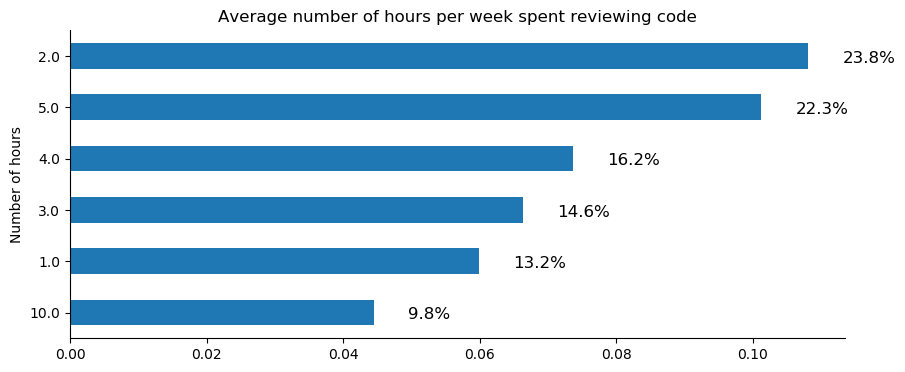

In [27]:
# Hours spend doing code review
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel("Number of hours")
display_bar_chart(df, "CodeRevHrs", "Average number of hours per week spent reviewing code")

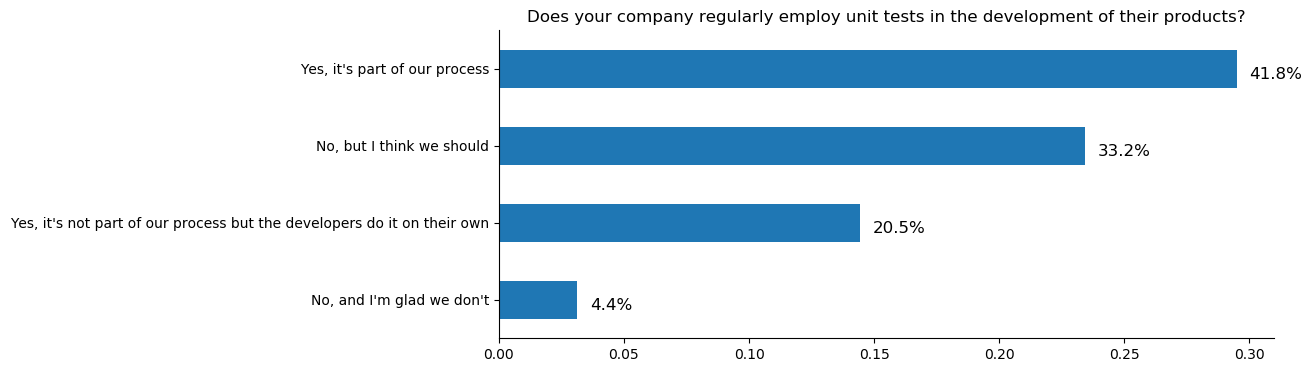

In [28]:
# Does your company regularly employ unit tests in the development of their products?
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "UnitTests", "Does your company regularly employ unit tests in the development of their products?")



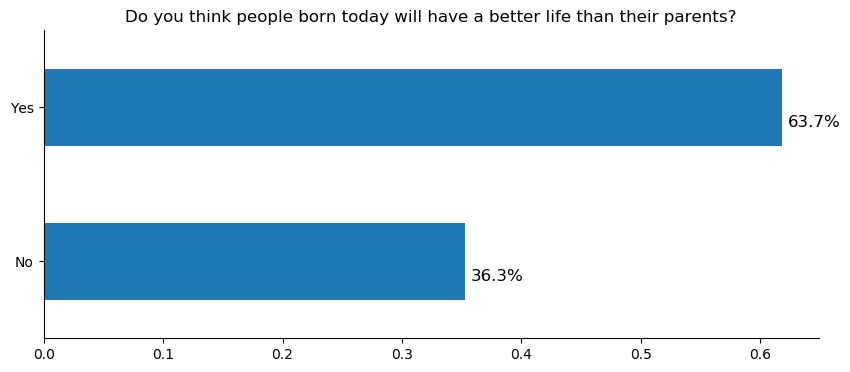

In [29]:
# Do you think people born today will have a better life than their parents?
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "BetterLife", "Do you think people born today will have a better life than their parents?")

/Users/havishamadhu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/havishamadhu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/havishamadhu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/havishamadhu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0, flags=flags)


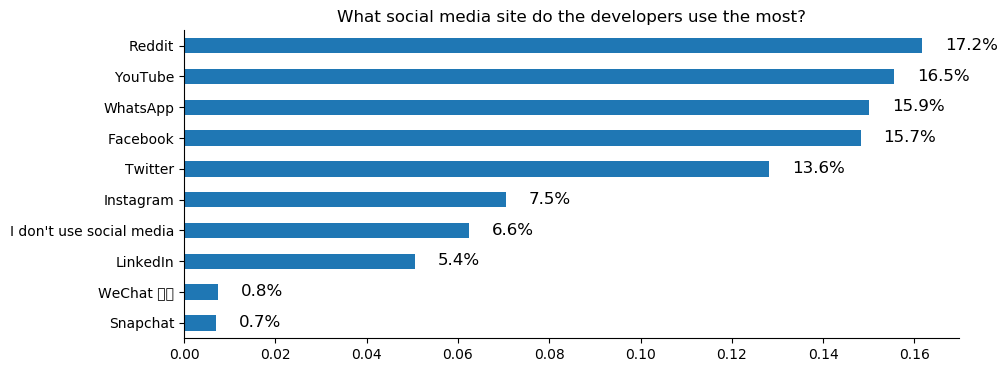

In [30]:
# What social media site do the developers use the most?
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "SocialMedia", "What social media site do the developers use the most?")

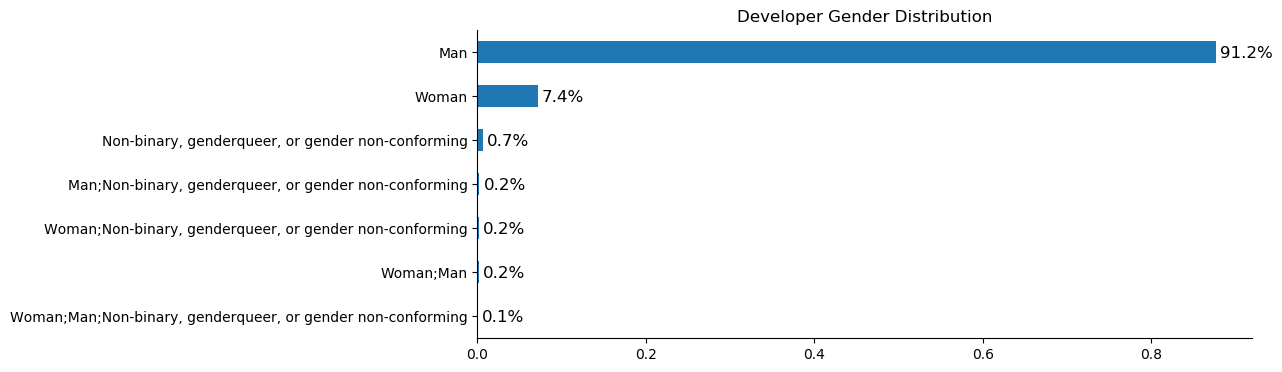

In [31]:
# Gender distribution
plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
display_bar_chart(df, "Gender", "Developer Gender Distribution")

## Data Preparation

In [32]:
# Taking the top 60 frequently appearing countries in the dataset
df['Country'].value_counts().nlargest(60)

United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Israel                  952
Turkey                  949
Pakistan                923
Ukraine                 868
Austria                 839
Czech Republic          764
Romania                 760
Iran                    738
Belgium                 727
China                   664
Bulgaria                659
Mexico                  642
South Africa            627
Denmark                 617
Bangladesh              605
Norway                  574
Greece                  556
Argentina               553
Finland                 546
Portugal                525
New Zealand         

In [33]:
# Splitting the country based on the time zone - top 60 countries
# Countries with GMT and GMT+ are the Eastern Countries 
# Countries wit GMT- are the Weatern countries
def country_split(df):
    '''
    
    Return a dataframe with country seperate into western and eastern
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df: a dataframe with a new column Country_West_East
    
    '''
    Western = ['United States','Canada', 'Brazil', 'Mexico', 'Argentina', 'Colombia', 'Chile']

    Eastern = ['India', 'Germany', 'United Kingdom' , 'France', 'Poland', 'Australia', 'Netherlands', 
               'Russian Federation', 'Spain', 
               'Italy', 'Sweden', 'Switzerland', 'Israel', 'Turkey', 'Pakistan', 'Ukraine', 'Austria', 'Czech Republic',
               'Romania', 'Iran', 
               'Belgium', 'China', 'Bulgaria', 'South Africa', 'Denmark', 'Bangladesh', 'Norway', 'Greece',
               'Finland', 'Portugal',
               'New Zealand', 'Nigeria', 'Hungary', 'Indonesia', 'Ireland', 'Serbia', 'Japan', 'Philippines', 'Sri Lanka', 'Egypt',
               'Singapore', 'Malaysia', 'Slovenia', 'Slovakia', 'Croatia', 'Kenya', 'Lithuania', 'Nepal', 'Viet Nam','Thailand', 
               'Belarus',
               'Estonia', 'Hong Kong (S.A.R.)' ]
    
    #Add a new catagory seperating to western and eastern
    df['Country_West_East'] = df['Country'].apply(lambda x: 'WesternCountries' if x in Western else ('EasternCountries' if x in Eastern else 'OtherCountries'))
    
    return df

In [34]:
# Code: Splitting the country into western and eastern countries
df = country_split(df)
# Test
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,Country_West_East
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Tech articles written by other developers;Indu...,14.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,EasternCountries
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Tech articles written by other developers;Indu...,19.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,OtherCountries
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Tech meetups or events in your area;Courses on...,28.00,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,EasternCountries
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.00,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,WesternCountries
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech meetups or events in your area;Courses on...,30.00,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy,EasternCountries


Here we select some useful columns for our analysis.

1. Country: Country they are living
2. Gender: Gender of the developer
3. MainBranch: Developer or not
4. WorkWeekHrs: Number of hours worked per week
5. YearsCode: Years they are coding
6. Employment: Their employment status
7. CompTotal: Their Salary
8. JobSat: Are they satisfied with their job
9. CareerSat: Are they satisfied with their career
10. Country_West_East: List of countries split into Eastern and Western countries


We especially focus on employed full-time professional developer.

In [35]:
def data_preparation(df):
    '''
    
    Return useful columns with query condition
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    useful_df: a filtered dataframe with only useful columns which we will work upon
    
    '''
    useful_columns = df[['Country','Gender', 'MainBranch', 'YearsCode', 'Employment', 'CareerSat', 'JobSat', 'WorkWeekHrs', 'CompTotal', 'Country_West_East']]
    
    useful_df = useful_columns.query("MainBranch == 'I am a developer by profession' and (Gender == 'Man' or Gender == 'Woman') and Employment == 'Employed full-time'")

    return useful_df


In [36]:
# Code: Selecting the columns we want to work on and analyze
useful_df = data_preparation(df)

In [37]:
# Test:
useful_df.head()

,Country,Gender,MainBranch,YearsCode,Employment,CareerSat,JobSat,WorkWeekHrs,CompTotal,Country_West_East
3,United States,Man,I am a developer by profession,3,Employed full-time,Very satisfied,Slightly satisfied,80.00,61000.00,WesternCountries
4,Ukraine,Man,I am a developer by profession,16,Employed full-time,Very dissatisfied,Slightly dissatisfied,55.00,nan,EasternCountries
8,New Zealand,Man,I am a developer by profession,12,Employed full-time,Slightly satisfied,Slightly satisfied,32.00,138000.00,EasternCountries
12,United States,Man,I am a developer by profession,17,Employed full-time,Very satisfied,Very satisfied,40.00,90000.00,WesternCountries
13,Germany,Man,I am a developer by profession,13,Employed full-time,Very satisfied,Very satisfied,40.00,4150.00,EasternCountries


In [38]:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52997 entries, 3 to 88330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            52997 non-null  object 
 1   Gender             52997 non-null  object 
 2   MainBranch         52997 non-null  object 
 3   YearsCode          52857 non-null  object 
 4   Employment         52997 non-null  object 
 5   CareerSat          52997 non-null  object 
 6   JobSat             52874 non-null  object 
 7   WorkWeekHrs        49292 non-null  float64
 8   CompTotal          43363 non-null  float64
 9   Country_West_East  52997 non-null  object 
dtypes: float64(2), object(8)
memory usage: 4.4+ MB


In [39]:
useful_df = useful_df.query("Employment == 'Employed full-time'")

In [40]:
useful_df["Employment"].value_counts()

Employed full-time    52997
Name: Employment, dtype: int64

In [41]:
useful_df = useful_df.query("Gender == 'Man' or Gender == 'Woman'")

In [42]:
useful_df["Gender"].value_counts()

Man      49229
Woman     3768
Name: Gender, dtype: int64

In [43]:
useful_df = useful_df.query("MainBranch == 'I am a developer by profession'")

In [44]:
useful_df['MainBranch'].value_counts()

I am a developer by profession    52997
Name: MainBranch, dtype: int64

In [45]:
# Checking for categorical values in the numerical columns
useful_df['YearsCode'].value_counts()

10                    4683
6                     3808
5                     3791
8                     3646
7                     3529
15                    2865
4                     2641
12                    2578
20                    2472
9                     2389
3                     1988
11                    1668
14                    1570
13                    1532
18                    1366
2                     1219
16                    1166
25                    1077
17                    1013
30                     899
19                     734
22                     711
23                     534
21                     496
35                     484
24                     459
1                      389
28                     306
40                     273
27                     271
26                     259
32                     258
33                     215
38                     201
37                     197
34                     191
36                     188
2

In [46]:
# Code: Dealing with the categorical values in the numerical column
useful_df['YearsCode'] = (
    np.select(
        condlist = [useful_df['YearsCode'] == 'Less than 1 year' , useful_df['YearsCode'] == 'More than 50 years', useful_df['YearsCode'] == False], 
        choicelist = [useful_df['YearsCode'] == 1, useful_df['YearsCode'] == 50, useful_df['YearsCode'] == 1], 
        default = useful_df['YearsCode']))
# Test:
useful_df['YearsCode'].value_counts()


10       4683
6        3808
5        3791
8        3646
7        3529
15       2865
4        2641
12       2578
20       2472
9        2389
3        1988
11       1668
14       1570
13       1532
18       1366
2        1219
16       1166
25       1077
17       1013
30        899
19        734
22        711
23        534
21        496
35        484
24        459
1         389
28        306
40        273
27        271
26        259
32        258
33        215
38        201
37        197
34        191
36        188
False     168
29        156
31        121
39         82
42         58
41         44
45         42
43         39
44         29
50         13
46         11
47         11
49         10
48          7
Name: YearsCode, dtype: int64

In [47]:
# Code: Converting the column into a numerical column
useful_df['YearsCode'] = pd.to_numeric(useful_df['YearsCode'])

# Test:
useful_df['YearsCode']

3        3.00
4       16.00
8       12.00
12      17.00
13      13.00
         ... 
88325   12.00
88326   17.00
88328   18.00
88329   10.00
88330    9.00
Name: YearsCode, Length: 52997, dtype: float64

In [48]:
# Code: Dropping all the columns with missing values
useful_df.dropna(inplace = True)

# Test:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42922 entries, 3 to 88330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            42922 non-null  object 
 1   Gender             42922 non-null  object 
 2   MainBranch         42922 non-null  object 
 3   YearsCode          42922 non-null  float64
 4   Employment         42922 non-null  object 
 5   CareerSat          42922 non-null  object 
 6   JobSat             42922 non-null  object 
 7   WorkWeekHrs        42922 non-null  float64
 8   CompTotal          42922 non-null  float64
 9   Country_West_East  42922 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.6+ MB


In [49]:
useful_df['CareerSat'].value_counts()

Very satisfied                        18233
Slightly satisfied                    15094
Slightly dissatisfied                  4247
Neither satisfied nor dissatisfied     3416
Very dissatisfied                      1932
Name: CareerSat, dtype: int64

In [54]:
# Converting the text in career satisfaction into a numerical value on a scale of 1-5
def careersat_mean(df):
    """
    
    Convert career satisfaction from words to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with careersatisfaction column becomes measurable
    
    """
    careersat_handling = {
        'Very satisfied' : 5,
        'Slightly satisfied' : 4,
        'Neither satisfied nor dissatisfied' : 3,
        'Slightly dissatisfied' : 2,
        'Very dissatisfied' : 1,
        np.nan: np.nan
    }
    useful_df['CareerSat'] = useful_df['CareerSat'].apply(lambda x: np.nan if x == np.nan else careersat_handling[x] )
    useful_df['CareerSat'] = pd.to_numeric(useful_df['CareerSat'])
    return df


In [55]:
# Code: Changin the categorical data in career satisfaction column into a numerical/measurable quantity
useful_df = careersat_mean(df)


In [56]:
# Test
useful_df['CareerSat'].value_counts()

5.00    29173
4.00    25018
2.00     7670
3.00     7252
1.00     3734
Name: CareerSat, dtype: int64

In [57]:
# Test
useful_df['CareerSat'].mean()

3.9365656787513554

In [58]:
# Job satisfaction in in terms of categorical values
useful_df['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [59]:
# Converting the text in job satisfaction into a numerical value on a scale of 1-5
def jobsat_mean(df):
    """
    
    Convert Overpaid from words to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with Overpaid column becomes measurable
    
    """
    jobsat_handling = {
        'Very satisfied' : 5,
        'Slightly satisfied' : 4,
        'Neither satisfied nor dissatisfied' : 3,
        'Slightly dissatisfied' : 2,
        'Very dissatisfied' : 1,
        np.nan: np.nan
    }
    useful_df['JobSat'] = useful_df['JobSat'].apply(lambda x: np.nan if x == np.nan else jobsat_handling[x] )
    useful_df['JobSat'] = pd.to_numeric(useful_df['JobSat'])
    return df


In [60]:
# Code: Changin the categorical data in job satisfaction column into a numerical/measurable quantity

useful_df = jobsat_mean(df)

In [61]:
# Test
useful_df['JobSat'].value_counts()

4.00    24207
5.00    22452
2.00    10752
3.00     8720
1.00     4857
Name: JobSat, dtype: int64

In [62]:
# Test
useful_df['JobSat'].mean()

3.6852566630979884

## Results and Visualizations

In [63]:
wwh = useful_df.groupby('Country_West_East')['WorkWeekHrs'].mean()

In [64]:
wwh

Country_West_East
EasternCountries   42.56
OtherCountries     40.25
WesternCountries   41.57
Name: WorkWeekHrs, dtype: float64

Text(0, 0.5, 'Countries Distribution')

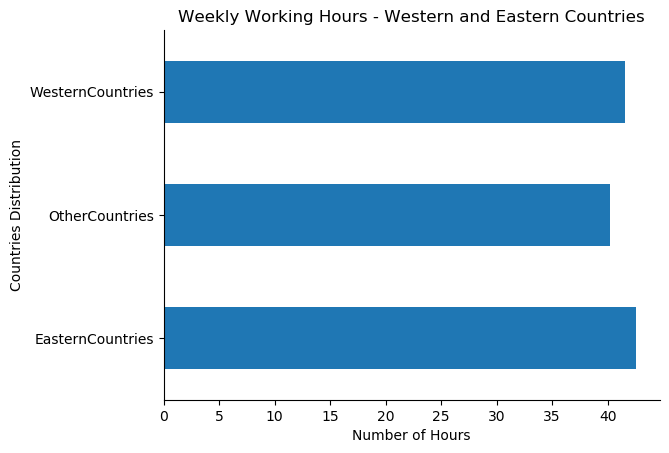

In [65]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
wwh.plot(kind = 'barh')
plt.title("Weekly Working Hours - Western and Eastern Countries");
plt.xlabel('Number of Hours')
plt.ylabel('Countries Distribution')

### OBSERVATION: The Eastern countries have greater mean working hours per week compares to Western countries

In [66]:
jsat = useful_df.groupby('Country_West_East')['JobSat'].mean()

In [67]:
jsat

Country_West_East
EasternCountries   3.63
OtherCountries     3.42
WesternCountries   3.83
Name: JobSat, dtype: float64

Text(0, 0.5, 'Countries Distribution')

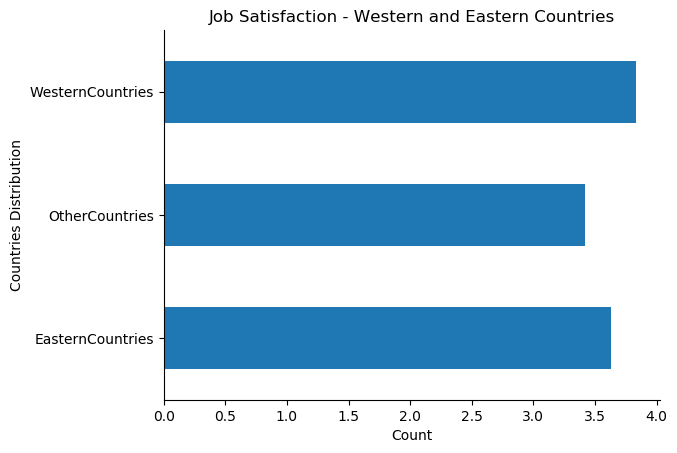

In [68]:
#plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
jsat.plot(kind = 'barh')
plt.title("Job Satisfaction - Western and Eastern Countries");
plt.xlabel('Count')
plt.ylabel('Countries Distribution')

### OBSERVATION: The Western countries seem to have a better mean Job Satisfaction compared to the Eastern coutries.

In [69]:
csat = useful_df.groupby('Country_West_East')['CareerSat'].mean()

In [70]:
csat

Country_West_East
EasternCountries   3.86
OtherCountries     3.63
WesternCountries   4.12
Name: CareerSat, dtype: float64

Text(0, 0.5, 'Countries Distribution')

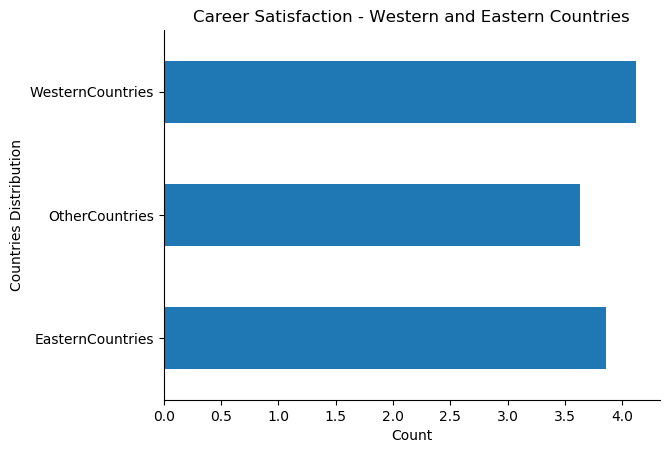

In [71]:
#plt.figure(figsize=(10,4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
csat.plot(kind = 'barh')
plt.title("Career Satisfaction - Western and Eastern Countries");
plt.xlabel('Count')
plt.ylabel('Countries Distribution')

### OBSERVATION: The Western countries seem to have a better mean Career Satisfaction compared to the Eastern coutries.

In [72]:
useful_df = useful_df.query("Employment == 'Employed full-time'")

In [73]:
emp = useful_df.groupby('Country_West_East')['Employment'].value_counts()

In [74]:
emp

Country_West_East  Employment        
EasternCountries   Employed full-time    39830
OtherCountries     Employed full-time     2751
WesternCountries   Employed full-time    21859
Name: Employment, dtype: int64

Text(0, 0.5, 'Countries Distribution')

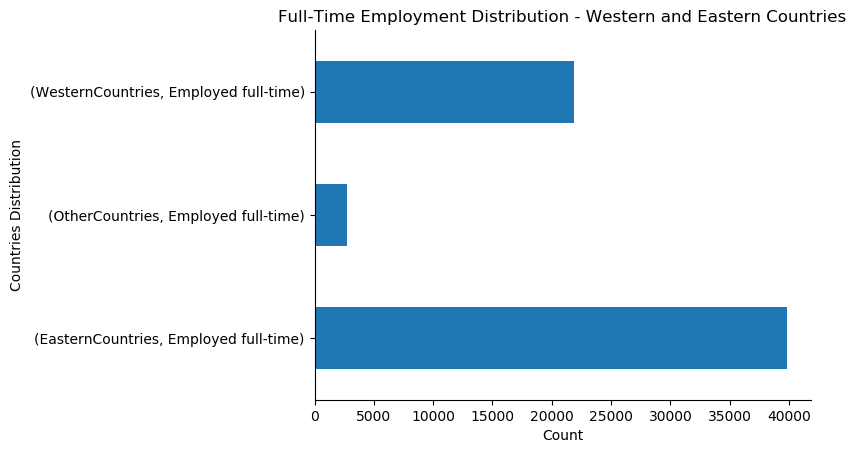

In [75]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
emp.plot(kind = 'barh')
plt.title("Full-Time Employment Distribution - Western and Eastern Countries");
plt.xlabel('Count')
plt.ylabel('Countries Distribution')

### OBSERVATION: The Eastern countries seem to have more full-time employees than the Western countries

In [76]:
useful_df = useful_df.query("Gender == 'Man' or Gender == 'Woman'")

In [77]:
ax = useful_df.groupby('Country_West_East')['Gender'].value_counts()

In [78]:
ax

Country_West_East  Gender
EasternCountries   Man       35691
                   Woman      2402
OtherCountries     Man        2371
                   Woman       195
WesternCountries   Man       18855
                   Woman      2004
Name: Gender, dtype: int64

Text(0, 0.5, 'Gender Distribution')

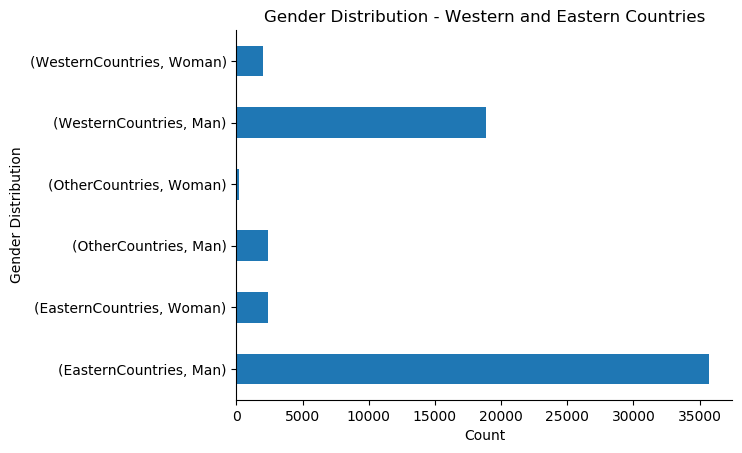

In [79]:
#plt.figure(figsize = (12,8))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.plot(kind = 'barh')
plt.title("Gender Distribution - Western and Eastern Countries");
plt.xlabel('Count')
plt.ylabel('Gender Distribution')

### The Western countries have a better Sex Ratio of developers than in the Eastern countries

In [80]:
# Removing the top 9 outliers
useful_df['CompTotal'].nlargest(20)

37922   10000000000000000.00
42067     869458022459309.00
54254         30000000000.00
41281          5700000000.00
23737          3333333333.00
54814          3000000000.00
33392          1800000000.00
27273          1500000000.00
57560          1200000000.00
36990           838695000.00
87221           800000000.00
65926           720000000.00
13261           700000000.00
75548           600000000.00
76890           600000000.00
48323           500000000.00
77403           500000000.00
69221           480000000.00
1347            450000000.00
46471           400000000.00
Name: CompTotal, dtype: float64

In [81]:
# Code: Removing the top 2 outliers
useful_df.drop(index = [37922, 42067], axis = 0, inplace = True)

In [82]:
# Test:
useful_df['CompTotal'].nlargest(10)

54254   30000000000.00
41281    5700000000.00
23737    3333333333.00
54814    3000000000.00
33392    1800000000.00
27273    1500000000.00
57560    1200000000.00
36990     838695000.00
87221     800000000.00
65926     720000000.00
Name: CompTotal, dtype: float64

In [83]:
compensation = useful_df.groupby('Country_West_East')['CompTotal'].mean()

In [84]:
compensation

Country_West_East
EasternCountries   2559437.16
OtherCountries     5612616.89
WesternCountries    211580.25
Name: CompTotal, dtype: float64

Text(0, 0.5, 'Gender Distribution')

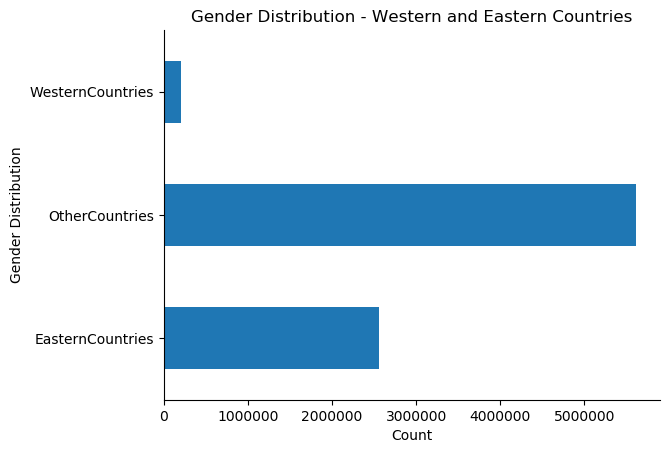

In [85]:
#plt.figure(figsize = (12,8))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
compensation.plot(kind = 'barh')
plt.title("Gender Distribution - Western and Eastern Countries");
plt.xlabel('Count')
plt.ylabel('Gender Distribution')

In [86]:
count_people = useful_df['Country_West_East'].value_counts()

In [87]:
compensation/count_people

EasternCountries     67.19
OtherCountries     2188.15
WesternCountries     10.14
dtype: float64

### OBSERVATION: The Eastern country developers seem to have a much greater salary compensation compared to Western country developers.

# Conclusion

### The results are based on the developers who have responded to the survey:

We have first looked into the individual statistics of the features in the dataset and have plotted some visualizations. We later split the dataset into Western and Eastern countries based on the top 60 countries. Upon analysing the differences between the Western and Eastern countries:
1. The Eastern countries seem to have greater mean working hours per week, more full-time employees and also lower sex ratio of developers compared to Western countries. They also have higher mean salaries.
2. The Western countries seem to have a better mean Job Satisfaction, mean Career Satisfaction, lesser working hours per week and better sex ratio compared to the Eastern coutries.

#### Overall, it looks like the Eastern countries offer greater salary compensation with greater hours per week while the Western countries offer greater Job and Career satisfaction for a developer.